output_new/train\SagWithHarmonicsOscillations\SagWithHarmonicsOscillations_WithoutNoise_1.png
output_new/train\SwellWithHarmonics\SwellWithHarmonics_WithoutNoise_2.png
output_new/train\SwellWithHarmonicsOscillations\SwellWithHarmonicsOscillations_WithoutNoise_3.png
output_new/train\SwellWithHarmonicsOscillations\SwellWithHarmonicsOscillations_WithoutNoise_4.png
output_new/train\SwellWithHarmonics\SwellWithHarmonics_WithoutNoise_5.png
output_new/train\OscillatoryTransient\OscillatoryTransient_WithoutNoise_6.png
output_new/train\SagWithHarmonics\SagWithHarmonics_WithoutNoise_7.png
output_new/train\SwellWithHarmonics\SwellWithHarmonics_WithoutNoise_8.png
output_new/train\OscillatoryTransient\OscillatoryTransient_WithoutNoise_9.png
output_new/train\SwellWithHarmonicsOscillations\SwellWithHarmonicsOscillations_WithoutNoise_10.png
output_new/train\SagWithHarmonicsOscillations\SagWithHarmonicsOscillations_WithoutNoise_11.png
output_new/train\SwellWithHarmonicsOscillations\SwellWithHarmonicsOs

KeyboardInterrupt: 

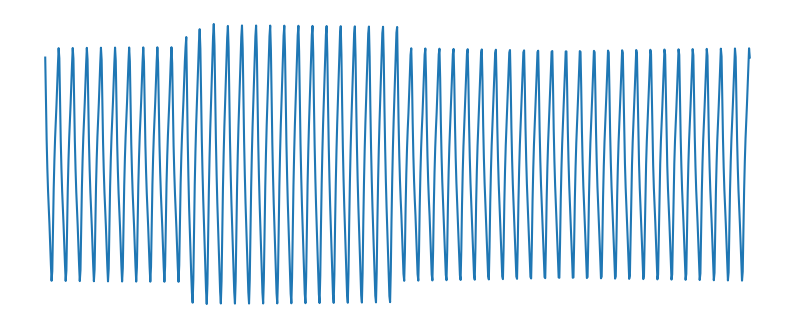

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

A = 1
omega = 2 * np.pi * 50
T = 1 / 50
t = np.linspace(0, 1, 1000)
phases = [0, np.pi/6, np.pi/4, np.pi/3, np.pi/2, 2*np.pi/3, 3*np.pi/4, 5*np.pi/6, np.pi,
          7*np.pi/6, 5*np.pi/4, 4*np.pi/3, 3*np.pi/2, 2*np.pi]
np.random.seed(0)  

def u(t):
    return np.heaviside(t, 1)

def pure_sine(t, phi, noise=False):
    signal = A * np.sin(omega * t + phi)
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def sag(t, alpha, t1, t2, phi, noise=False):
    signal = (1 - alpha * (u(t - t1) - u(t - t2))) * np.sin(omega * t + phi)
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def swell(t, alpha, t1, t2, phi, noise=False):
    signal = (1 + alpha * (u(t - t1) - u(t - t2))) * np.sin(omega * t + phi)
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def interruption(t, alpha, t1, t2, phi, noise=False):
    signal = alpha * (u(t - t1) - u(t - t2)) * np.sin(omega * t + phi)
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def harmonics(t, alpha1, alpha3, alpha5, alpha7, phi, noise=False):
    signal = alpha1 * np.sin(omega * t + phi) + alpha3 * np.sin(3 * omega * t + phi) + alpha5 * np.sin(5 * omega * t + phi) + alpha7 * np.sin(7 * omega * t + phi)
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def oscillatory_transient(t, alpha, t1, tau, omega_n, phi, noise=False):
    signal = np.sin(omega * t + phi) + alpha * np.exp(-(t - t1) / tau) * np.sin(omega_n * (t - t1) + phi) * (u(t - t1) - u(t - t1 - 3 * tau))
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def flicker(t, alpha_f, beta, phi, noise=False):
    signal = (1 + alpha_f * np.sin(beta * t)) * np.sin(omega * t + phi)
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def impulse_transient(t, K, t1, t2, phi, noise=False):
    signal = np.sin(omega * t + phi) + np.sign(np.sin(omega * t + phi)) * K * (u(t - t1) - u(t - t2))
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def notch(t, K, t1, t2, phi, noise=False):
    signal = np.sin(omega * t + phi) - np.sign(np.sin(omega * t + phi)) * K * (u(t - t1) - u(t - t2))
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def sag_with_harmonics(t, alpha, t1, t2, alpha1, alpha3, alpha5, alpha7, phi, noise=False):
    signal = sag(t, alpha, t1, t2, phi) + harmonics(t, alpha1, alpha3, alpha5, alpha7, phi)
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def swell_with_harmonics(t, alpha, t1, t2, alpha1, alpha3, alpha5, alpha7, phi, noise=False):
    signal = swell(t, alpha, t1, t2, phi) + harmonics(t, alpha1, alpha3, alpha5, alpha7, phi)
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def sag_with_oscillation(t, alpha, phi, beta, t3, omega_n, noise=False):
    signal = A * np.sin(omega * t - phi) * (1 - alpha * (u(t - t3) - u(t - t3 - 3 * T))) + beta * np.exp(-(t - t3) / T) * np.sin(omega_n * (t - t3) + phi) * (u(t - t3) - u(t - t3 - 3 * T))
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def swell_with_oscillation(t, alpha, phi, beta, t3, omega_n, noise=False):
    signal = A * np.sin(omega * t - phi) * (1 + alpha * (u(t - t3) - u(t - t3 - 3 * T))) + beta * np.exp(-(t - t3) / T) * np.sin(omega_n * (t - t3) + phi) * (u(t - t3) - u(t - t3 - 3 * T))
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def swell_with_harmonics_oscillations(t, alpha, t1, t2, alpha1, alpha3, alpha5, alpha7, beta, phi, t3, omega_n, noise=False):
    signal = swell_with_harmonics(t, alpha, t1, t2, alpha1, alpha3, alpha5, alpha7, phi) + beta * np.exp(-(t - t3) / T) * np.sin(omega_n * (t - t3) + phi) * (u(t - t3) - u(t - t3 - 3 * T))
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def sag_with_harmonics_oscillations(t, alpha, t1, t2, alpha1, alpha3, alpha5, alpha7, beta, phi, t3, omega_n, noise=False):
    signal = sag_with_harmonics(t, alpha, t1, t2, alpha1, alpha3, alpha5, alpha7, phi) + beta * np.exp(-(t - t3) / T) * np.sin(omega_n * (t - t3) + phi) * (u(t - t3) - u(t - t3 - 3 * T))
    if noise:
        signal += np.random.normal(0, 0.1, len(t))
    return signal

def plot_pq_event(event_func, t, save_path, *args):
    plt.figure(figsize=(10, 4))
    plt.plot(t, event_func(t, *args))
    plt.axis('off')
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def generate_dataset():
    dataset = []
    labels = []
    noisy_count = {}
    
    for phi in phases:
        dataset.append((pure_sine(t, phi), 'PureSine', phi, False))
        dataset.append((pure_sine(t, phi, noise=True), 'PureSine', phi, True))
        noisy_count['PureSine'] = 2

    for alpha in np.linspace(0.1, 0.8, 5):
        for phi in phases:
            label = 'Sag'
            if noisy_count.get(label, 0) < 2:
                dataset.append((sag(t, alpha, 0.2, 0.5, phi, noise=True), label, phi, True))
                noisy_count[label] = noisy_count.get(label, 0) + 1
            dataset.append((sag(t, alpha, 0.2, 0.5, phi), label, phi, False))

    for alpha in np.linspace(0.1, 0.8, 5):
        for phi in phases:
            label = 'Swell'
            if noisy_count.get(label, 0) < 2:
                dataset.append((swell(t, alpha, 0.2, 0.5, phi, noise=True), label, phi, True))
                noisy_count[label] = noisy_count.get(label, 0) + 1
            dataset.append((swell(t, alpha, 0.2, 0.5, phi), label, phi, False))

    for alpha in np.linspace(0.1, 0.8, 5):
        for phi in phases:
            label = 'Interruption'
            if noisy_count.get(label, 0) < 2:
                dataset.append((interruption(t, alpha, 0.2, 0.5, phi, noise=True), label, phi, True))
                noisy_count[label] = noisy_count.get(label, 0) + 1
            dataset.append((interruption(t, alpha, 0.2, 0.5, phi), label, phi, False))

    for alpha1, alpha3, alpha5, alpha7 in zip(np.linspace(0.8, 1.2, 3), np.linspace(0.2, 0.5, 3), np.linspace(0.05, 0.1, 3), np.linspace(0.01, 0.05, 3)):
        for phi in phases:
            label = 'Harmonics'
            if noisy_count.get(label, 0) < 2:
                dataset.append((harmonics(t, alpha1, alpha3, alpha5, alpha7, phi, noise=True), label, phi, True))
                noisy_count[label] = noisy_count.get(label, 0) + 1
            dataset.append((harmonics(t, alpha1, alpha3, alpha5, alpha7, phi), label, phi, False))

    for alpha in np.linspace(0.1, 0.8, 5):
        for tau in np.linspace(0.01, 0.1, 5):
            for omega_n in np.linspace(2 * np.pi * 50, 2 * np.pi * 100, 5):
                for phi in phases:
                    label = 'OscillatoryTransient'
                    if noisy_count.get(label, 0) < 2:
                        dataset.append((oscillatory_transient(t, alpha, 0.2, tau, omega_n, phi, noise=True), label, phi, True))
                        noisy_count[label] = noisy_count.get(label, 0) + 1
                    dataset.append((oscillatory_transient(t, alpha, 0.2, tau, omega_n, phi), label, phi, False))

    for alpha_f, beta in zip(np.linspace(0.1, 0.4, 5), np.linspace(0.1, 0.4, 5)):
        for phi in phases:
            label = 'Flicker'
            if noisy_count.get(label, 0) < 2:
                dataset.append((flicker(t, alpha_f, beta, phi, noise=True), label, phi, True))
                noisy_count[label] = noisy_count.get(label, 0) + 1
            dataset.append((flicker(t, alpha_f, beta, phi), label, phi, False))

    for K in np.linspace(0.5, 1.5, 5):
        for phi in phases:
            label = 'ImpulseTransient'
            if noisy_count.get(label, 0) < 2:
                dataset.append((impulse_transient(t, K, 0.2, 0.25, phi, noise=True), label, phi, True))
                noisy_count[label] = noisy_count.get(label, 0) + 1
            dataset.append((impulse_transient(t, K, 0.2, 0.25, phi), label, phi, False))

    for K in np.linspace(0.5, 1.5, 5):
        for phi in phases:
            label = 'Notch'
            if noisy_count.get(label, 0) < 2:
                dataset.append((notch(t, K, 0.2, 0.25, phi, noise=True), label, phi, True))
                noisy_count[label] = noisy_count.get(label, 0) + 1
            dataset.append((notch(t, K, 0.2, 0.25, phi), label, phi, False))

    for alpha in np.linspace(0.1, 0.8, 5):
        for alpha1, alpha3, alpha5, alpha7 in zip(np.linspace(0.8, 1.2, 3), np.linspace(0.2, 0.5, 3), np.linspace(0.05, 0.1, 3), np.linspace(0.01, 0.05, 3)):
            for phi in phases:
                label = 'SagWithHarmonics'
                if noisy_count.get(label, 0) < 2:
                    dataset.append((sag_with_harmonics(t, alpha, 0.2, 0.5, alpha1, alpha3, alpha5, alpha7, phi, noise=True), label, phi, True))
                    noisy_count[label] = noisy_count.get(label, 0) + 1
                dataset.append((sag_with_harmonics(t, alpha, 0.2, 0.5, alpha1, alpha3, alpha5, alpha7, phi), label, phi, False))

    for alpha in np.linspace(0.1, 0.8, 5):
        for alpha1, alpha3, alpha5, alpha7 in zip(np.linspace(0.8, 1.2, 3), np.linspace(0.2, 0.5, 3), np.linspace(0.05, 0.1, 3), np.linspace(0.01, 0.05, 3)):
            for phi in phases:
                label = 'SwellWithHarmonics'
                if noisy_count.get(label, 0) < 2:
                    dataset.append((swell_with_harmonics(t, alpha, 0.2, 0.5, alpha1, alpha3, alpha5, alpha7, phi, noise=True), label, phi, True))
                    noisy_count[label] = noisy_count.get(label, 0) + 1
                dataset.append((swell_with_harmonics(t, alpha, 0.2, 0.5, alpha1, alpha3, alpha5, alpha7, phi), label, phi, False))

    for alpha in np.linspace(0.1, 0.8, 5):
        for beta in np.linspace(0.2, 0.5, 3):
            for omega_n in np.linspace(2 * np.pi * 50, 2 * np.pi * 100, 5):
                for phi in phases:
                    label = 'SagWithOscillation'
                    if noisy_count.get(label, 0) < 2:
                        dataset.append((sag_with_oscillation(t, alpha, phi, beta, 0.2, omega_n, noise=True), label, phi, True))
                        noisy_count[label] = noisy_count.get(label, 0) + 1
                    dataset.append((sag_with_oscillation(t, alpha, phi, beta, 0.2, omega_n), label, phi, False))

    for alpha in np.linspace(0.1, 0.8, 5):
        for beta in np.linspace(0.2, 0.5, 3):
            for omega_n in np.linspace(2 * np.pi * 50, 2 * np.pi * 100, 5):
                for phi in phases:
                    label = 'SwellWithOscillation'
                    if noisy_count.get(label, 0) < 2:
                        dataset.append((swell_with_oscillation(t, alpha, phi, beta, 0.2, omega_n, noise=True), label, phi, True))
                        noisy_count[label] = noisy_count.get(label, 0) + 1
                    dataset.append((swell_with_oscillation(t, alpha, phi, beta, 0.2, omega_n), label, phi, False))

    for alpha in np.linspace(0.1, 0.8, 5):
        for alpha1, alpha3, alpha5, alpha7 in zip(np.linspace(0.8, 1.2, 3), np.linspace(0.2, 0.5, 3), np.linspace(0.05, 0.1, 3), np.linspace(0.01, 0.05, 3)):
            for beta in np.linspace(0.2, 0.5, 3):
                for omega_n in np.linspace(2 * np.pi * 50, 2 * np.pi * 100, 5):
                    for phi in phases:
                        label = 'SwellWithHarmonicsOscillations'
                        if noisy_count.get(label, 0) < 2:
                            dataset.append((swell_with_harmonics_oscillations(t, alpha, 0.2, 0.5, alpha1, alpha3, alpha5, alpha7, beta, phi, 0.2, omega_n, noise=True), label, phi, True))
                            noisy_count[label] = noisy_count.get(label, 0) + 1
                        dataset.append((swell_with_harmonics_oscillations(t, alpha, 0.2, 0.5, alpha1, alpha3, alpha5, alpha7, beta, phi, 0.2, omega_n), label, phi, False))

    for alpha in np.linspace(0.1, 0.8, 5):
        for alpha1, alpha3, alpha5, alpha7 in zip(np.linspace(0.8, 1.2, 3), np.linspace(0.2, 0.5, 3), np.linspace(0.05, 0.1, 3), np.linspace(0.01, 0.05, 3)):
            for beta in np.linspace(0.2, 0.5, 3):
                for omega_n in np.linspace(2 * np.pi * 50, 2 * np.pi * 100, 5):
                    for phi in phases:
                        label = 'SagWithHarmonicsOscillations'
                        if noisy_count.get(label, 0) < 2:
                            dataset.append((sag_with_harmonics_oscillations(t, alpha, 0.2, 0.5, alpha1, alpha3, alpha5, alpha7, beta, phi, 0.2, omega_n, noise=True), label, phi, True))
                            noisy_count[label] = noisy_count.get(label, 0) + 1
                        dataset.append((sag_with_harmonics_oscillations(t, alpha, 0.2, 0.5, alpha1, alpha3, alpha5, alpha7, beta, phi, 0.2, omega_n), label, phi, False))
    return dataset


train_dir = 'output_new/train'
test_dir = 'output_new/test'

def ensure_min_samples_per_class(dataset, min_samples=2):
    unique_labels = set([item[1] for item in dataset]) 
    for label in unique_labels:
        count = sum(1 for item in dataset if item[1] == label)
        if count < min_samples:
            idx = next(i for i, item in enumerate(dataset) if item[1] == label)
            for _ in range(min_samples - count):
                dataset.append(dataset[idx])
    return dataset

dataset = generate_dataset()

dataset = ensure_min_samples_per_class(dataset)
X = [item[0] for item in dataset]
y = [item[1] for item in dataset]
phis = [item[2] for item in dataset]
noise = [item[3] if len(item) > 3 else False for item in dataset]

X_train, X_test, y_train, y_test, phi_train, phi_test, noise_train, noise_test = train_test_split(
    X, y, phis, noise, test_size=0.3, random_state=42, stratify=y
)

train_dir = 'output_new/train'
test_dir = 'output_new/test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def save_pq_event(data, label, phi, is_noisy, save_dir, index):
    base_path = os.path.join(save_dir, label)
    os.makedirs(base_path, exist_ok=True)
    
    save_path = os.path.join(base_path, f"{label}_WithoutNoise_{index}.png")
    print(save_path)
    plot_pq_event(lambda t, p: data, t, save_path, phi)
    
    if is_noisy:
        noisy_data = data + np.random.normal(0, 0.1, len(data))
        save_path = os.path.join(base_path, f"{label}_WithNoise_{index}.png")
        plot_pq_event(lambda t, p: noisy_data, t, save_path, phi)

for i, (data, label, phi, is_noisy) in enumerate(zip(X_train, y_train, phi_train, noise_train)):
    save_pq_event(data, label, phi, is_noisy, train_dir, i+1)

for i, (data, label, phi, is_noisy) in enumerate(zip(X_test, y_test, phi_test, noise_test)):
    save_pq_event(data, label, phi, is_noisy, test_dir, i+1)

print("Dataset generation and saving completed.")

In [29]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import os
from efficientnet_pytorch import EfficientNet

model = EfficientNet.from_pretrained('efficientnet-b7')
model._fc = torch.nn.Identity()
model.eval()

transform = transforms.Compose([
    transforms.RandomResizedCrop(600, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((600, 600)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def extract_features(image_path, model, transform):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        features = model(image)
    return features.squeeze().numpy()

train_dir = 'output_new/train'
test_dir = 'output_new/test'

all_train_features = []
all_train_features_labels = []

all_test_features = []
all_test_features_labels = []

for label in os.listdir(train_dir):
    label_dir = os.path.join(train_dir, label)
    if os.path.isdir(label_dir):
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            features = extract_features(image_path, model, transform)
            all_train_features.append(features)
            all_train_features_labels.append(os.listdir(test_dir).index(label))

for label in os.listdir(test_dir):
    label_dir = os.path.join(test_dir, label)
    if os.path.isdir(label_dir):
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            features = extract_features(image_path, model, test_transform)
            all_test_features.append(features)
            all_test_features_labels.append(os.listdir(test_dir).index(label))

all_train_features = np.array(all_train_features)
all_train_features_labels = np.array(all_train_features_labels)

all_test_features = np.array(all_test_features)
all_test_features_labels = np.array(all_test_features_labels)

print("Feature extraction completed.")
print("Train features shape:", all_train_features.shape)
print("Train labels shape:", all_train_features_labels.shape)
print("Test features shape:", all_test_features.shape)
print("Test labels shape:", all_test_features_labels.shape)

Loaded pretrained weights for efficientnet-b0
Feature extraction completed.
Train features shape: (1328, 1280)
Train labels shape: (1328,)
Test features shape: (562, 1280)
Test labels shape: (562,)


In [30]:
import numpy as np
np.save("all_train_features.npy", all_train_features)
np.save("all_train_features_labels.npy", all_train_features_labels)
np.save("all_test_features.npy", all_test_features)
np.save("all_test_features_labels.npy", all_test_features_labels)

In [31]:
import numpy as np

In [38]:
all_train_features = np.load("all_train_features.npy")
all_train_features_labels = np.load("all_train_features_labels.npy")

all_test_features = np.load("all_test_features.npy")
all_test_features_labels = np.load("all_test_features_labels.npy")

In [39]:
train_dir = 'output_new/train'
test_dir = 'output_new/test'

In [40]:
def evaluate(classifier, features, labels):
    classifier.eval()
    with torch.no_grad():
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == labels).sum().item() / len(labels)
    return accuracy

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_train_features = scaler.fit_transform(all_train_features)
all_test_features = scaler.transform(all_test_features)

In [42]:
import torch.nn as nn
import torch
import os
import torch.optim as optim
from torch.optim.lr_scheduler import CyclicLR
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class CrossAttention(nn.Module):
    def __init__(self, feature_dim, num_heads):
        super(CrossAttention, self).__init__()
        self.query = nn.Linear(feature_dim, feature_dim)
        self.key = nn.Linear(feature_dim, feature_dim)
        self.value = nn.Linear(feature_dim, feature_dim)
        self.num_heads = num_heads
        self.attention = nn.MultiheadAttention(embed_dim=feature_dim, num_heads=num_heads)

    def forward(self, features):
        query = self.query(features)
        key = self.key(features)
        value = self.value(features)
        
        query = query.unsqueeze(1).transpose(0, 1)
        key = key.unsqueeze(1).transpose(0, 1)
        value = value.unsqueeze(1).transpose(0, 1)
        
        attended_features, _ = self.attention(query, key, value)
        return attended_features.squeeze(0)

class ImageClassifier(nn.Module):
    def __init__(self, feature_dim, num_classes, num_heads, hidden_dim, num_layers):
        super(ImageClassifier, self).__init__()
        self.bi_lstm = nn.LSTM(input_size=feature_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.cross_attention = CrossAttention(hidden_dim * 2, num_heads) 
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        self.bn = nn.BatchNorm1d(hidden_dim * 2)
        self.dropout = nn.Dropout(0.55)

    def forward(self, features):
        lstm_out1, _1 = self.bi_lstm(features.unsqueeze(1))
        lstm_out1 = lstm_out1.squeeze(1)   
        attended_features = self.cross_attention(lstm_out1)
        attended_features = self.bn(attended_features)
        attended_features = self.dropout(attended_features)
        logits = self.fc(attended_features)
        return logits

feature_dim = all_train_features.shape[1]
num_classes = len(os.listdir(train_dir))
num_heads = 4
hidden_dim = 64
num_layers = 1  

classifier_bi = ImageClassifier(feature_dim, num_classes, num_heads, hidden_dim, num_layers)

features_tensor = torch.tensor(all_train_features, dtype=torch.float32)
labels_tensor = torch.tensor(all_train_features_labels, dtype=torch.long)

features_tensor_test = torch.tensor(all_test_features, dtype=torch.float32)
labels_tensor_test = torch.tensor(all_test_features_labels, dtype=torch.long)

class_weights = compute_class_weight('balanced', classes=np.unique(all_train_features_labels), y=all_train_features_labels)
class_weights = torch.FloatTensor(class_weights)

criterion_bi = nn.CrossEntropyLoss()
optimizer_bi = optim.AdamW(classifier_bi.parameters(), lr=0.0001, weight_decay=1e-5)

num_epochs = 600
best_accuracy = 0.0
best_model_path = "best_model_trainxa.pth"

base_lr = 1e-5
max_lr = 1e-2
step_size_up = 2000  
scheduler = CyclicLR(optimizer_bi, base_lr, max_lr, step_size_up, mode='triangular2')

for epoch in range(num_epochs):
    classifier_bi.train()
    optimizer_bi.zero_grad()
    train_outputs = classifier_bi(features_tensor)
    train_loss = criterion_bi(train_outputs, labels_tensor)
    train_loss.backward()
    optimizer_bi.step()
    scheduler.step()
    classifier_bi.eval()

    with torch.no_grad():
        test_outputs = classifier_bi(features_tensor_test)
        test_loss = criterion_bi(test_outputs, labels_tensor_test)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    train_accuracy = evaluate(classifier_bi, features_tensor, labels_tensor)
    print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

    test_accuracy = evaluate(classifier_bi, features_tensor_test, labels_tensor_test)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch [1/600], Train Loss: 3.0195, Test Loss: 2.7033
Train Accuracy: 13.83%
Test Accuracy: 14.29%
Epoch [2/600], Train Loss: 3.0165, Test Loss: 2.7013
Train Accuracy: 14.04%
Test Accuracy: 15.27%
Epoch [3/600], Train Loss: 3.0061, Test Loss: 2.6984
Train Accuracy: 14.26%
Test Accuracy: 16.26%
Epoch [4/600], Train Loss: 2.9329, Test Loss: 2.6946
Train Accuracy: 15.11%
Test Accuracy: 16.75%
Epoch [5/600], Train Loss: 2.8076, Test Loss: 2.6897
Train Accuracy: 15.11%
Test Accuracy: 16.75%
Epoch [6/600], Train Loss: 2.8744, Test Loss: 2.6836
Train Accuracy: 16.38%
Test Accuracy: 18.23%
Epoch [7/600], Train Loss: 2.8470, Test Loss: 2.6761
Train Accuracy: 19.79%
Test Accuracy: 21.67%
Epoch [8/600], Train Loss: 2.7195, Test Loss: 2.6671
Train Accuracy: 22.13%
Test Accuracy: 23.15%
Epoch [9/600], Train Loss: 2.6431, Test Loss: 2.6565
Train Accuracy: 25.96%
Test Accuracy: 25.62%
Epoch [10/600], Train Loss: 2.5245, Test Loss: 2.6442
Train Accuracy: 28.94%
Test Accuracy: 30.05%
Epoch [11/600], Tra

In [10]:
classifier_bi.load_state_dict(torch.load("best_model_trainxa.pth"))

<All keys matched successfully>

In [20]:
print("Shape of all_train_features:", all_train_features.shape)
print("Shape of all_test_features:", all_test_features.shape)


Shape of all_train_features: (1328, 2304)
Shape of all_test_features: (562, 2304)
